#### Sentiment Analysis Full Stack

In [2]:
#!pip install pandas
#!pip install matplotlib
#!pip install nltk
#!pip install contractions
#!pip install mglearn
#!pip install gensim
#!pip install flask
#!pip install gunicorn
#!pip install Jinja2
#!pip install MarkupSafe
#pip install Werkzeug
'''
Out of scope
Class imbalance
Model monitoring => Drift, model degradation
Model evaluation 
Word Vector techniques 
LLMs or neural network techniques 
'''

'\nOut of scope\nClass imbalance\nModel monitoring => Drift, model degradation\nModel evaluation \nWord Vector techniques \nLLMs or neural network techniques \n'

In [3]:
import re
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import pickle

In [4]:
data = pd.read_csv('tweets.csv')
data.head()
# 0 postive
# 1 neg

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [6]:
# check for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
# drop the id column
data.drop(['id'], axis=1, inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [8]:
# Check for the class balance
data['label'].value_counts(normalize=True)

label
0    0.744192
1    0.255808
Name: proportion, dtype: float64

<Axes: xlabel='label'>

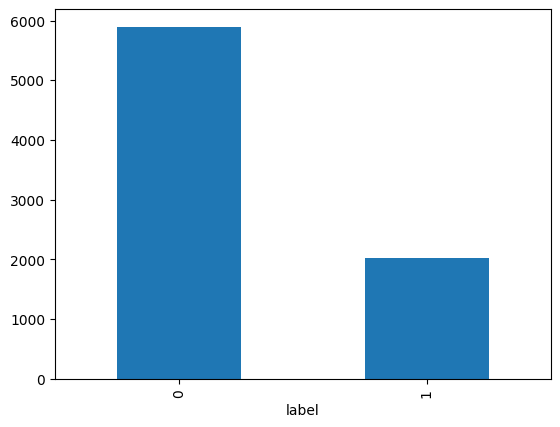

In [9]:
# plot the label counts 
data['label'].value_counts().plot(kind='bar')

In [10]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [11]:
# Substitute 's with " is" 
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [12]:
# Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [13]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [14]:
# remove the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [15]:
re.sub("#", "", data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [16]:
# Removing the hyperlinks
re.sub(r"http\S+", "", data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [17]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Tawfiq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Tawfiq/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
# stop words are more neutral words 
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{"should've", "that'll", 'few', 'my', 'i', 'ours', 'how', 'once', "hasn't", 'or', 'mightn', 'only', 'at', 'am', 'most', "haven't", 'on', 'any', 'himself', 'doing', 'weren', 'do', 'needn', 'hasn', 'through', 've', 'own', "wasn't", 'a', 'out', 'here', 'd', "doesn't", 'o', 'down', 'there', 'because', 'those', 'before', 'of', "you're", 'off', 'being', 'between', 'it', 'his', 'had', 'won', 'with', "she's", 'didn', 'herself', 'this', 'is', 'have', 'but', "couldn't", 'hadn', 'not', 'doesn', 'were', "shouldn't", 'll', 'them', 'yourself', 'm', 'he', 'if', 'nor', "shan't", 'both', 'me', 'been', 'they', 'will', 'theirs', 'by', 'couldn', 'shouldn', 'our', 'why', 'don', "didn't", 'same', 'mustn', 'does', 'can', 'after', 'again', "you've", 'as', 'yours', 'no', 'ourselves', 'who', "it's", "wouldn't", 'when', 't', 'your', "won't", 'wouldn', 'shan', 'yourselves', 'did', 'until', 'hers', "you'd", 'very', 'isn', 'in', 'ma', 'where', "aren't", 'than', 'for', 'has', 'to', 'such', 'him', 'what', 'an', 'more

In [19]:
len(nltk_stopwords)

179

In [20]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'get', 'eleven', 'i', 'ours', 'co', 'throughout', 'becoming', 'or', 'besides', 'at', 'on', 'any', 'whence', 'latter', 'whereby', 'etc', 'last', 'nothing', 'side', 'through', 'own', 'a', 'ever', 'yet', 'third', 'down', 'mostly', 'hasnt', 'because', 'could', 'whole', 'those', 'hundred', 'being', 'between', 'even', 'around', 'part', 'noone', 'call', 'give', 'but', 'have', 'herself', 'this', 'fifty', 'cry', 'whatever', 'were', 'whereas', 'them', 'yourself', 'he', 'somewhere', 'if', 'see', 'across', 'many', 'they', 'herein', 'by', 'nowhere', 'except', 'either', 'inc', 'our', 'whereafter', 'thereupon', 'sincere', 'take', 'ourselves', 'ltd', 'becomes', 'who', 'none', 'when', 'cant', 'enough', 'though', 'became', 'nevertheless', 'yourselves', 'until', 'meanwhile', 'another', 'would', 'seems', 'very', 'seemed', 'where', 'find', 'hence', 'than', 'others', 'more', 'sometime', 'anyhow', 'ten', 'should', 'six', 'its', 'never', 'via', 'every', 'forty', 'toward', 'fifteen', 'something', 'nobody', 'p

In [21]:
len(sklearn_stopwords)

318

In [22]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'few', 'my', 'i', 'ours', 'how', 'once', 'or', 'only', 'at', 'am', 'most', 'on', 'any', 'himself', 'do', 'through', 'own', 'a', 'out', 'here', 'down', 'there', 'because', 'those', 'before', 'of', 'off', 'being', 'between', 'it', 'his', 'had', 'with', 'herself', 'this', 'is', 'have', 'but', 'not', 'were', 'them', 'yourself', 'he', 'if', 'nor', 'both', 'me', 'been', 'they', 'will', 'by', 'our', 'why', 'same', 'can', 'after', 'again', 'as', 'yours', 'no', 'ourselves', 'who', 'when', 'your', 'yourselves', 'until', 'hers', 'very', 'in', 'where', 'than', 'for', 'has', 'to', 'such', 'him', 'what', 'an', 'more', 'should', 'whom', 'its', 'above', 'from', 'was', 'and', 'these', 'are', 'myself', 'now', 're', 'other', 'their', 'the', 'all', 'some', 'so', 'she', 'up', 'be', 'into', 'themselves', 'too', 'below', 'during', 'each', 'her', 'itself', 'over', 'which', 'we', 'further', 'then', 'about', 'you', 'while', 'that', 'under', 'against'}


In [23]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [24]:
len(combined_stopwords)

378

In [25]:
# Text Normalization: Stemming or Lemmatization reduce words to it base form 
'''
stemming
"running" -> "run"
"happier" -> "happi"
"cats" -> "cat

Pros:
Simple and fast.
Reduces words to a common base form, which can help in information retrieval and search engines.

Cons:
The resulting stems may not be actual words.
Can be too aggressive, sometimes removing too many characters, leading to loss of meaning.

Lemmatization (perfer)
"running" -> "run"
"happier" -> "happy"
"better" -> "good"

Pros:
Produces valid words.
Takes context and part of speech into account, leading to more accurate results.

Cons:
Slower and more computationally intensive than stemming.
Requires more resources, such as a lexical database.
'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [26]:
data['tweet'][63]

'Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow #ff i7si'

In [27]:
new_sent = ''
for token in data['tweet'][63].split():
    new_sent += lemmatizer.lemmatize(token.lower()) + ' '

new_sent
# compare the Followers to follow

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [28]:
# contractions didn't, wouldn't, can't
# expand them
import contractions
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [29]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

Define the Cleaner Function & Apply

In [30]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = re.sub(r"https\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [31]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [32]:
cleaned_tweets[:5] 

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [33]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


Data Visualization

In [34]:
import matplotlib.pyplot as plt

In [35]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['tweet']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

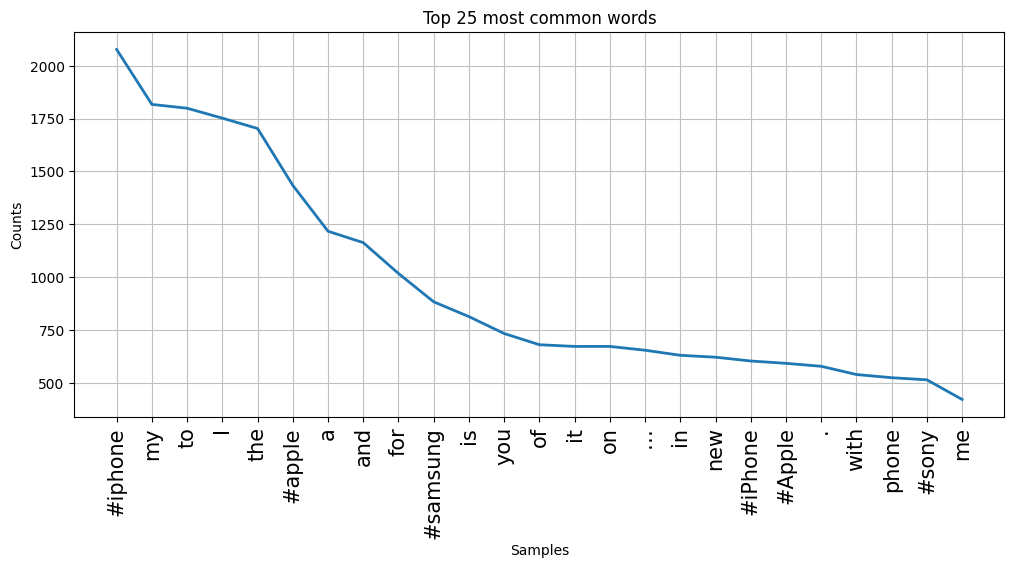

In [36]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [37]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words))

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


15981

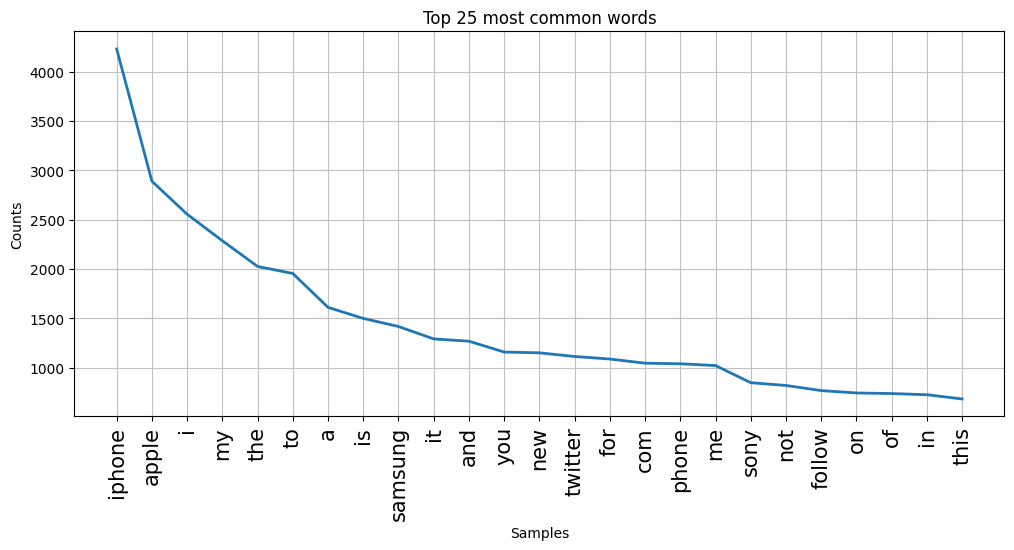

In [38]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [39]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = re.sub(r"https\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [40]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [41]:
data.columns

Index(['label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [42]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


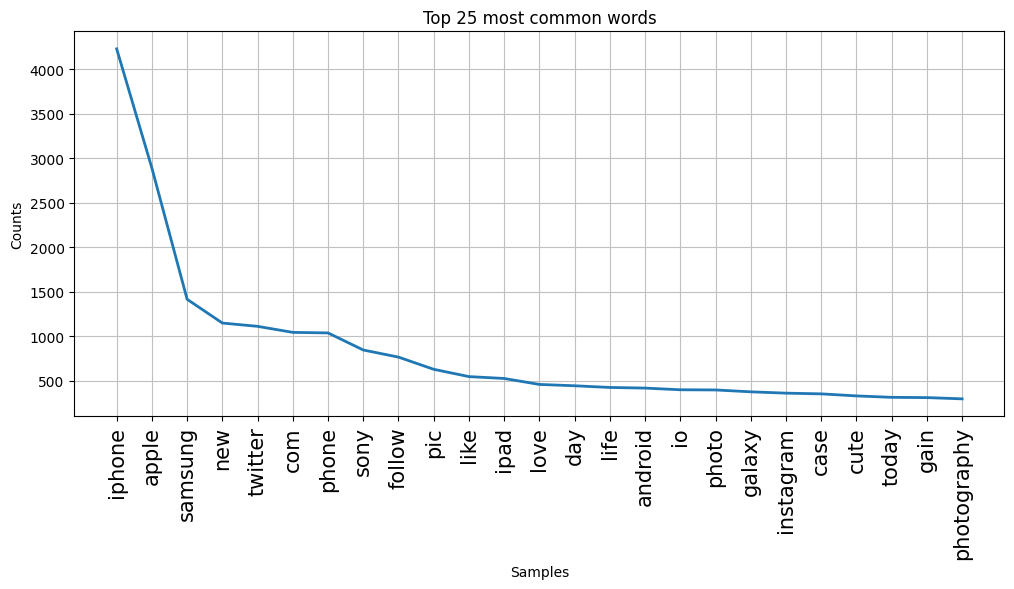

In [43]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [44]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

# Bag of Words Model (Feature Extraction)

#### Bag of words model:
- cleaned_doc1: "I love cooking"
- cleaned_doc2: "today I cooked tasty pasta today"

##### Differnt modes
##### Binary: marks the presence of a word from vocab in document

- vocab: [I, love, cooking, coked, pasta, today, ?]
- doc1: [1 1 1 0 0 0 0]
- doc2: [1 0 0 1 1 1 1]

- ? represents words in the document, but not in the vocab

- the length of each document vector = total no. words in the vocab !!! x = [2 x 7]
- Document-Term-Matrix X = [N x p] N = number of documents and p = is the unique words in the vocab!! 

###### --------------------------------------------------------------------------------

##### Count : retains the count off a words from the vocab in the document
- cleaned_doc1: "I love cooking"
- cleaned_doc2: "today I cooked tasty pasta today"

- vocab: [I, love, cooking, coked, pasta, today, ?]
- doc1: [1 1 1 0 0 0 0]
- doc2: [1 0 0 1 1 2 1]


###### --------------------------------------------------------------------------------

##### Freq : retains the count of a word from the vocab in the doc and normalizing it (divide by total no. of words in a document)

- cleaned_doc1: "I love cooking"
- cleaned_doc2: "today I cooked tasty pasta today"

- vocab: [I, love, cooking, coked, pasta, today, ?]
- doc1: [1 1 1 0 0 0 0]
- doc2: [1 0 0 1 1 2 1]


- doc1_normalised: [1 1 1 0 0 0 0] / len(doc1)
- doc2_normalised: [1 0 0 1 1 1 1] / len (doc2)

###### --------------------------------------------------------------------------------

#### TF-IDF : TF_score * IDF_score

- TF = Term Freq = no. of times the word apperas in a given doc / (total no. words in the doc)

- IDF = Inverse Document Freq = log(1 + no. of documents / 1 + no of documents in which this word appeared )
IDF will be higher for those words which are less freq in the ooverall corpus



In [45]:
data.shape

(7920, 4)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])

In [47]:
CV_features.shape

(7920, 15955)

In [48]:
# 15955 is the vocab

In [49]:
CV_features[0]

<1x15955 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [50]:
type(CV_features[0])  # each row is a compressed spare row. Majiorty of the data are zeros

scipy.sparse._csr.csr_matrix

In [51]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [52]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df.size/1e6  # these many elements/numbers are presnt in the df in millions

126.3636

In [54]:
import numpy as np
np.count_nonzero(df)

114973

In [55]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.09098585352110893

In [56]:
print(CV.get_feature_names_out()[:50])  # these the vocab words

['aa' 'aaaahhhhhhh' 'aag' 'aah' 'aalborg' 'aand' 'aapl' 'aarhus' 'aaron'
 'aarp' 'aarrrggghhhh' 'aashamsakal' 'aaydojbfkq' 'aayp' 'ab' 'abah'
 'abareta' 'abay' 'abb' 'abc' 'abdou' 'abe' 'aber' 'abercrombie' 'abi'
 'ability' 'abit' 'able' 'ableton' 'abnqum' 'aboard' 'about' 'aboutalook'
 'aboutdamntime' 'abouttime' 'abouttonight' 'above' 'abp' 'abscbn'
 'absence' 'absolute' 'absolutely' 'absurd' 'abu' 'abudhabi' 'abuja'
 'abujacity' 'abujafct' 'abujapeople' 'abujaphones']


In [57]:
len(CV.get_feature_names_out())

15955

In [58]:
CV_features[10].todense()  # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [59]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 11th tweet

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

#### Model building

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

In [61]:
# default options
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(f'Train score: {LR.score(X_train, y_train)}')  # train score)
print(f'Test Score: {LR.score(X_test, y_test)}')   # test score)

Train score: 0.9779461279461279
Test Score: 0.8813131313131313


In [62]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(f'Train score: {LR1.score(X_train, y_train)}')  # train score)
print(f'Test Score: {LR1.score(X_test, y_test)}')   # test score)

Train score: 0.9038720538720538
Test Score: 0.8813131313131313


In [63]:
## leT'S Cross-Validate the Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [64]:
X = CV_features
y = data['label']

In [65]:
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(f'scores : {results}')
print(f'Mean score :  {np.round((results.mean())*100, 2), np.round((results.std())*100, 2)}') 

scores : [0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
Mean score :  (88.28, 0.93)


In [66]:
# your's accuracy = 88.28 +/- 0.93 %

In [67]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

In [68]:
results

{'fit_time': array([0.0502131 , 0.03812099, 0.03969479, 0.03864694, 0.05305386]),
 'score_time': array([0.00150204, 0.0014627 , 0.00134826, 0.00136423, 0.00237727]),
 'test_score': array([0.88320707, 0.86931818, 0.87752525, 0.89709596, 0.88699495]),
 'train_score': array([0.90388258, 0.90893308, 0.9040404 , 0.90372475, 0.90451389])}

In [69]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

[0.90388258 0.90893308 0.9040404  0.90372475 0.90451389]
90.5 0.2


In [70]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


#### Hyper parameter tuning of the LR1 model

In [71]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END .............................C=0.050010000000000006; total time=   0.1s
[CV] END .............................C=0.050010000000000006; total time=   0.1s
[CV] END .............................C=0.050010000000000006; total time=   0.1s
[CV] END .............................C=0.050010000000000006; total time=   0.1s
[CV] END ..........................................C=0.10001; total time=   0.1s
[CV] END ..........................................C=0.10001; total time=   0.1s
[CV] END .............................C=0.05001

In [72]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [73]:

grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.8904040404040403, 19)

In [74]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [75]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.04040404040403

In [76]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

93.28282828282829

In [77]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.6457935279062846

In [78]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.84494949, 0.86338384, 0.87171717, 0.87537879,
       0.8790404 , 0.88017677, 0.88156566, 0.88282828, 0.88497475,
       0.88560606, 0.88661616, 0.88699495, 0.88876263, 0.88939394,
       0.88901515, 0.88939394, 0.88939394, 0.89015152, 0.89040404])

In [79]:

grid_results.cv_results_['mean_train_score']

array([0.74419192, 0.85      , 0.86998106, 0.88030303, 0.88718434,
       0.89232955, 0.89649621, 0.90094697, 0.90498737, 0.90811237,
       0.91003788, 0.91344697, 0.91568813, 0.91856061, 0.92133838,
       0.92332702, 0.92604167, 0.92856692, 0.93055556, 0.93282828])

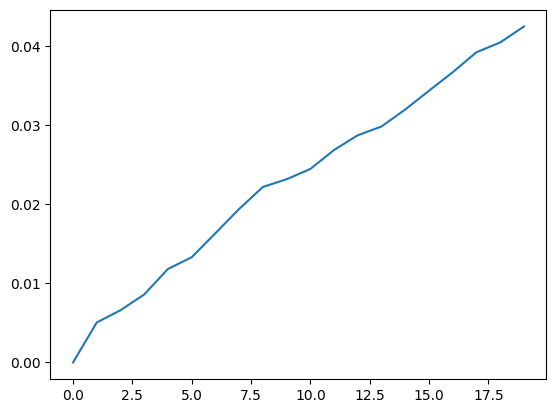

In [80]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [81]:

grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [82]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [83]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([-1.11022302e-16,  5.05050505e-03,  6.59722222e-03,  8.58585859e-03,
        1.18055556e-02,  1.32891414e-02,  1.63194444e-02,  1.93813131e-02,
        2.21590909e-02,  2.31376263e-02,  2.44318182e-02,  2.68308081e-02,
        2.86931818e-02,  2.97979798e-02,  3.19444444e-02,  3.43118687e-02,
        3.66477273e-02,  3.91729798e-02,  4.04040404e-02,  4.24242424e-02])

In [84]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

88.28 0.93


In [85]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [86]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [87]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

15955

#### LR Model without vs with stop_words

In [88]:
CV_pipe['CV'].vocabulary_

{'fingerprint': 4549,
 'pregnancy': 10875,
 'test': 13759,
 'android': 452,
 'apps': 666,
 'beautiful': 1206,
 'cute': 3020,
 'health': 5925,
 'igers': 6443,
 'iphoneonly': 7021,
 'iphonesia': 7034,
 'iphone': 6985,
 'finally': 4533,
 'transparant': 14200,
 'silicon': 12511,
 'case': 2142,
 'thanks': 13801,
 'to': 14056,
 'my': 9244,
 'uncle': 14526,
 'yay': 15688,
 'sony': 12834,
 'xperia': 15608,
 'sonyexperias': 12844,
 'we': 15105,
 'love': 8232,
 'this': 13920,
 'would': 15487,
 'you': 15794,
 'go': 5354,
 'talk': 13571,
 'makememories': 8448,
 'unplug': 14590,
 'relax': 11533,
 'smartphone': 12681,
 'wifi': 15302,
 'connect': 2706,
 'am': 378,
 'wired': 15347,
 'know': 7628,
 'george': 5191,
 'wa': 14976,
 'made': 8389,
 'that': 13812,
 'way': 15085,
 'daventry': 3132,
 'home': 6127,
 'what': 15205,
 'amazing': 389,
 'service': 12292,
 'apple': 583,
 'will': 15312,
 'not': 9706,
 'even': 4148,
 'me': 8636,
 'about': 31,
 'question': 11224,
 'have': 5874,
 'unless': 14579,
 'pay':

In [89]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.87 1.07


15673

In [90]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.77 1.03


1086

In [91]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

85.24 1.3


300

#### TF-IDF Vector BoW Model + Logistic Regression

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.82 0.14
85.24 0.84


1000

#### Dimesionality Reduction

In [93]:
# we are usinf TruncatedSVD instead of PCA as PCA does not work well with sparse data
# [7920 x 15955] >>> [7920 x 1000] 

In [94]:
from sklearn.decomposition import TruncatedSVD

X = data['cleaned_tweets_w/o_SW']
y = data['label']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  

87.42 0.25
86.57 0.83


15955

In [95]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [96]:
# everything above was based on unigram model because individual tokens were words 

# now try more then one word 

#### N-Gram Models

In [97]:
# Unigrams + Bigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min doc freq of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.89 0.21
86.84 0.68


3322

In [98]:
CV.vocabulary_

{'fingerprint': 903,
 'test': 2950,
 'android': 64,
 'apps': 175,
 'beautiful': 252,
 'cute': 624,
 'health': 1241,
 'igers': 1332,
 'iphoneonly': 1561,
 'iphonesia': 1570,
 'iphone': 1461,
 'android apps': 66,
 'apps beautiful': 176,
 'beautiful cute': 254,
 'igers iphoneonly': 1335,
 'iphoneonly iphonesia': 1566,
 'iphonesia iphone': 1573,
 'finally': 894,
 'case': 430,
 'thanks': 2974,
 'yay': 3284,
 'sony': 2716,
 'xperia': 3277,
 'sony xperia': 2737,
 'love': 1789,
 'talk': 2917,
 'relax': 2416,
 'smartphone': 2677,
 'wifi': 3221,
 'connect': 557,
 'iphone smartphone': 1537,
 'wired': 3234,
 'know': 1656,
 'wa': 3172,
 'way': 3198,
 'home': 1279,
 'iphone cute': 1479,
 'amazing': 54,
 'service': 2587,
 'apple': 95,
 'question': 2367,
 'pay': 2164,
 'stupid': 2847,
 'support': 2880,
 'service apple': 2588,
 'software': 2706,
 'update': 3102,
 'fucked': 1001,
 'big': 288,
 'time': 2997,
 'iphones': 1569,
 'software update': 2707,
 'big time': 289,
 'happy': 1202,
 'instapic': 1426,


In [99]:
CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2),
                 stop_words=['phone', 'mobile', 'twitter', 'rt', 'com', 'follow',
                             'get', "that'll", 'eleven', 'i', 'ours', 'co',
                             'throughout', 'becoming', "hasn't", 'or', 'mightn',
                             'besides', 'at', 'on', 'any', 'weren', 'whence',
                             'latter', 'whereby', 'etc', 'last', 'needn',
                             'nothing', 'side', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [100]:
CV_pipe.named_steps.keys()

dict_keys(['CV', 'LR'])

In [101]:
import mglearn

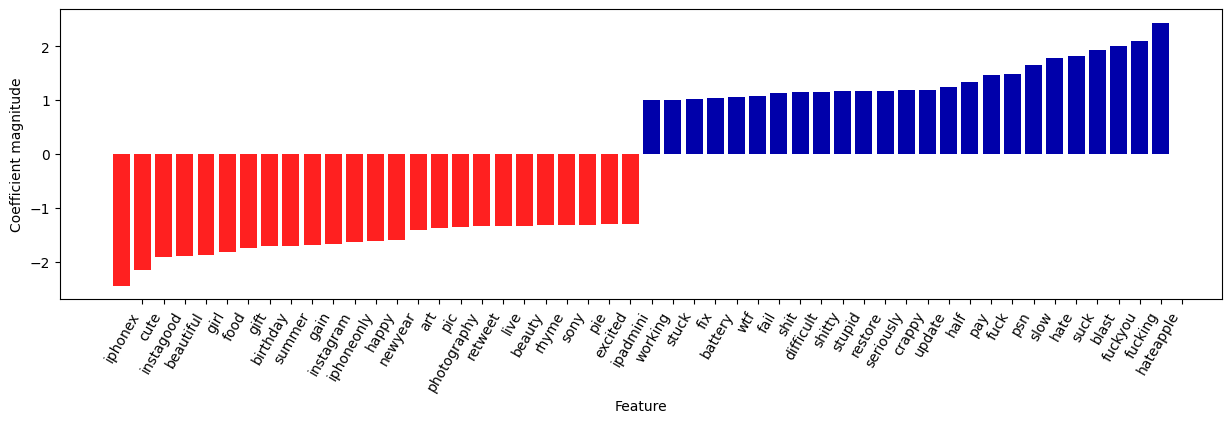

In [102]:
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
feature_names = np.array(CV.get_feature_names_out())

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)

In [103]:
len(coef.ravel()), len(feature_names) 

(3322, 3322)

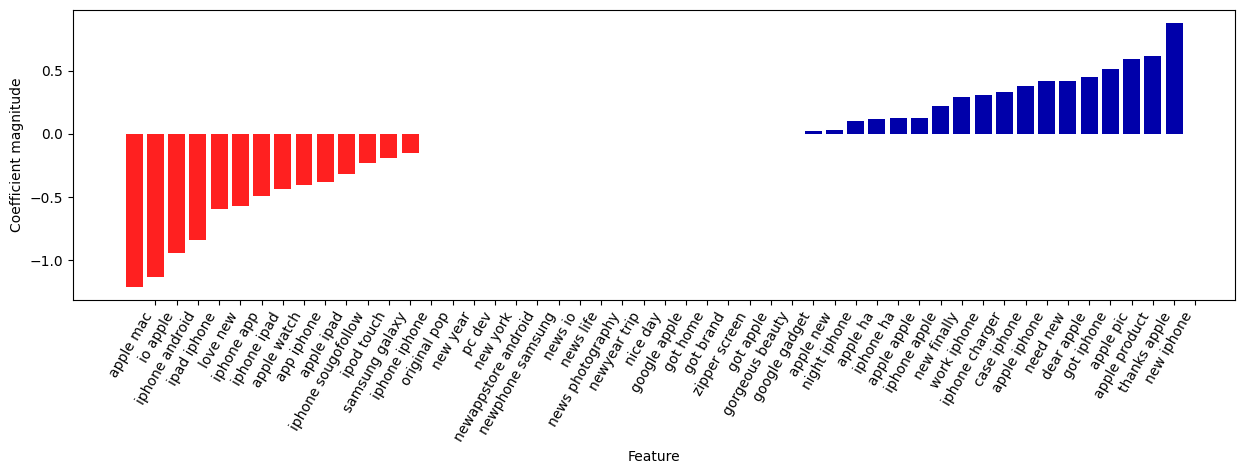

In [104]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)

In [105]:
# Unigrams + Bigrams + Trigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.88 0.2
86.84 0.68


3871

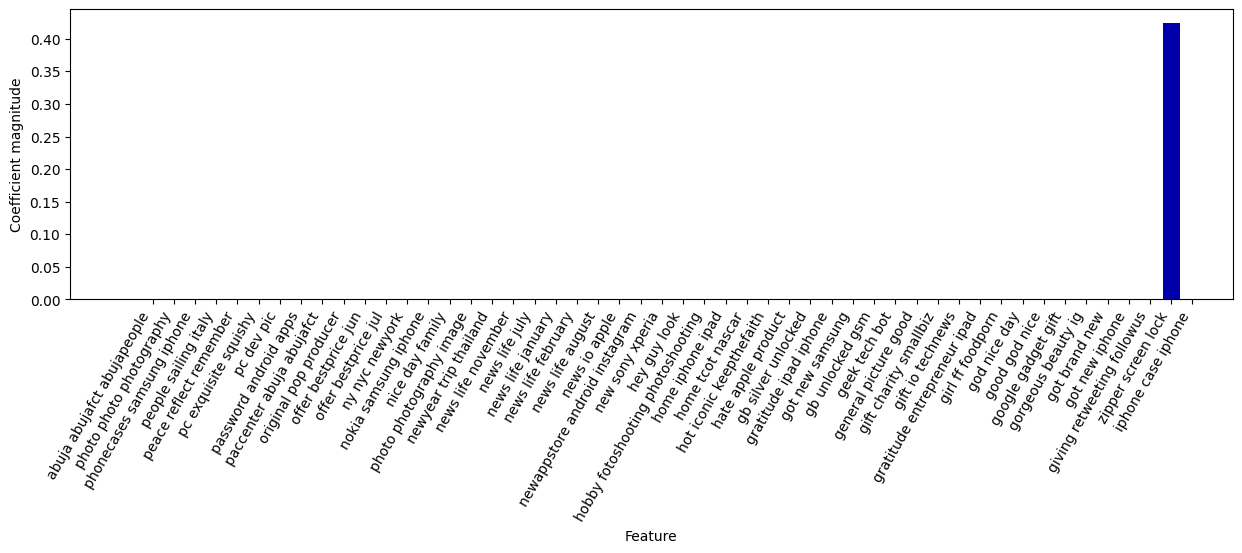

In [106]:

feature_names = np.array(CV.get_feature_names_out())
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3

LR1.fit(CV.transform(X), y)  

coef = LR1.coef_

mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)


In [107]:
len(coef.ravel()), len(feature_names)

(3871, 3871)

In [108]:
CV.vocabulary_

{'fingerprint': 1033,
 'test': 3454,
 'android': 76,
 'apps': 210,
 'beautiful': 296,
 'cute': 721,
 'health': 1438,
 'igers': 1540,
 'iphoneonly': 1848,
 'iphonesia': 1858,
 'iphone': 1697,
 'android apps': 78,
 'apps beautiful': 211,
 'beautiful cute': 299,
 'igers iphoneonly': 1545,
 'iphoneonly iphonesia': 1854,
 'iphonesia iphone': 1862,
 'android apps beautiful': 79,
 'apps beautiful cute': 212,
 'finally': 1023,
 'case': 497,
 'thanks': 3482,
 'yay': 3829,
 'sony': 3182,
 'xperia': 3822,
 'sony xperia': 3208,
 'love': 2103,
 'talk': 3413,
 'relax': 2830,
 'smartphone': 3138,
 'wifi': 3759,
 'connect': 646,
 'iphone smartphone': 1818,
 'wired': 3774,
 'know': 1955,
 'wa': 3708,
 'way': 3735,
 'home': 1479,
 'iphone cute': 1727,
 'amazing': 62,
 'service': 3030,
 'apple': 117,
 'question': 2772,
 'pay': 2533,
 'stupid': 3332,
 'support': 3370,
 'service apple': 3031,
 'software': 3170,
 'update': 3633,
 'fucked': 1154,
 'big': 341,
 'time': 3506,
 'iphones': 1857,
 'software updat

Limitations with BOW modeles

1. High sparsity of the feature matrix
2. High Dimentionality of the Document Term Matrix
3. Ordering of the words in a doc is lost. (Loss of context) no semantic relation between words

Some solutions
1. use feature slection techniques to narrow f=down to few useful feature. can use optionls filters like min_df, max_df and max_features is nothing else works
2. use TruncatedSVD for Dimensionality reduction
3. N-Gram tokenization ... but this is good for some extend...better to use word embeddings

Use word embeddings as a solution
1. Word Embeddings model gives word vectors which are dense represenation (never sparsed)
2. The dimensionality of the fetures set is limited by the size of the word embedding
3. Word2Vec models: retain the context of each word in a given document
4. GloVe (Global vectors) models reatin the context of each word in the entire corpus
5. FastText (facebook) encoding characters instead of words

These are all deep learning models


#### Word Embeddings
A word embedding is a class of approaches for representing words and documents using a dense vector representation. It is an improvement over more the traditional bag-of-word model encoding schemes where large sparse vectors were used to represent each word or to score each word within a vector to represent an entire vocabulary. These representations were sparse because the vocabularies were vast and a given word or document would be represented by a large vector comprised mostly of zero values.

Instead, in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space. The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used. The position of a word in the learned vector space is referred to as its embedding. Two popular examples of methods of learning word embeddings from text include:

Word2Vec.
GloVe.
In addition to these carefully designed methods, a word embedding can be learned as part of a deep learning model. This can be a slower approach, but tailors the model to a specific training dataset.

In [109]:
test_tweeet = ["amazing service apple talk question unless pay stupid support"]
r = CV_pipe.predict(test_tweeet)

In [110]:
r = CV_pipe.predict(test_tweeet)
if r == 1:
    print('The response is: negative')
else:
    print('The response is: positive')

The response is: negative


In [111]:
with open(r'LR_Pipeline.pickle', 'wb') as handle:
    pickle.dump(CV_pipe, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [112]:
# storing the df for future use. 
data.to_pickle("tweets_cleaned.pkl")